# *Assignment #3*

## **[CSCI 581](https://www.ecst.csuchico.edu/~bjuliano/csci581/)**, Spring 2022

Jayarani Emekar

# **Instructions**

Answer the following questions based on the  [Life Expectancy (WHO) dataset](https://www.kaggle.com/augustus0498/life-expectancy-who) available [here](https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/Life%20Expectancy%20Data.csv) using any of the Python libraries we have discussed in class:


In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model as skl
# Regression Modelling
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
#import the dataset 
df = pd.read_csv("https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/Life%20Expectancy%20Data.csv")
display(df.head(6))
df.info()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               


# A. Which country has the *shortest* average life expectancy?
1. Support your answer by providing your  calculations.
2. Support your answer by providing an appropriate chart.

## Solution(s)

In [61]:
# group all rows by unique values in 'Country' column, then take the mean of 
# all values possible (numerical) of duplicate rows with the same country name 
groupedByCounterAndAvergedDf = df.groupby(['Country']).mean().reset_index()

# clean up data set (remove null values)
groupedByCounterAndAvergedDf = groupedByCounterAndAvergedDf[groupedByCounterAndAvergedDf['Life expectancy '].notna()]

# get the name of the country (row index) of country with shortest 
# average life expectancy and the corrosponding value to it
rowIdx = groupedByCounterAndAvergedDf['Life expectancy '].idxmin()
countryName = groupedByCounterAndAvergedDf.loc[rowIdx][0]
avgLifeExpec = groupedByCounterAndAvergedDf.loc[rowIdx][2]

print(f'the country {countryName}, has the shortest average life expectency at an average of {avgLifeExpec}')

the country Sierra Leone, has the shortest average life expectency at an average of 46.1125


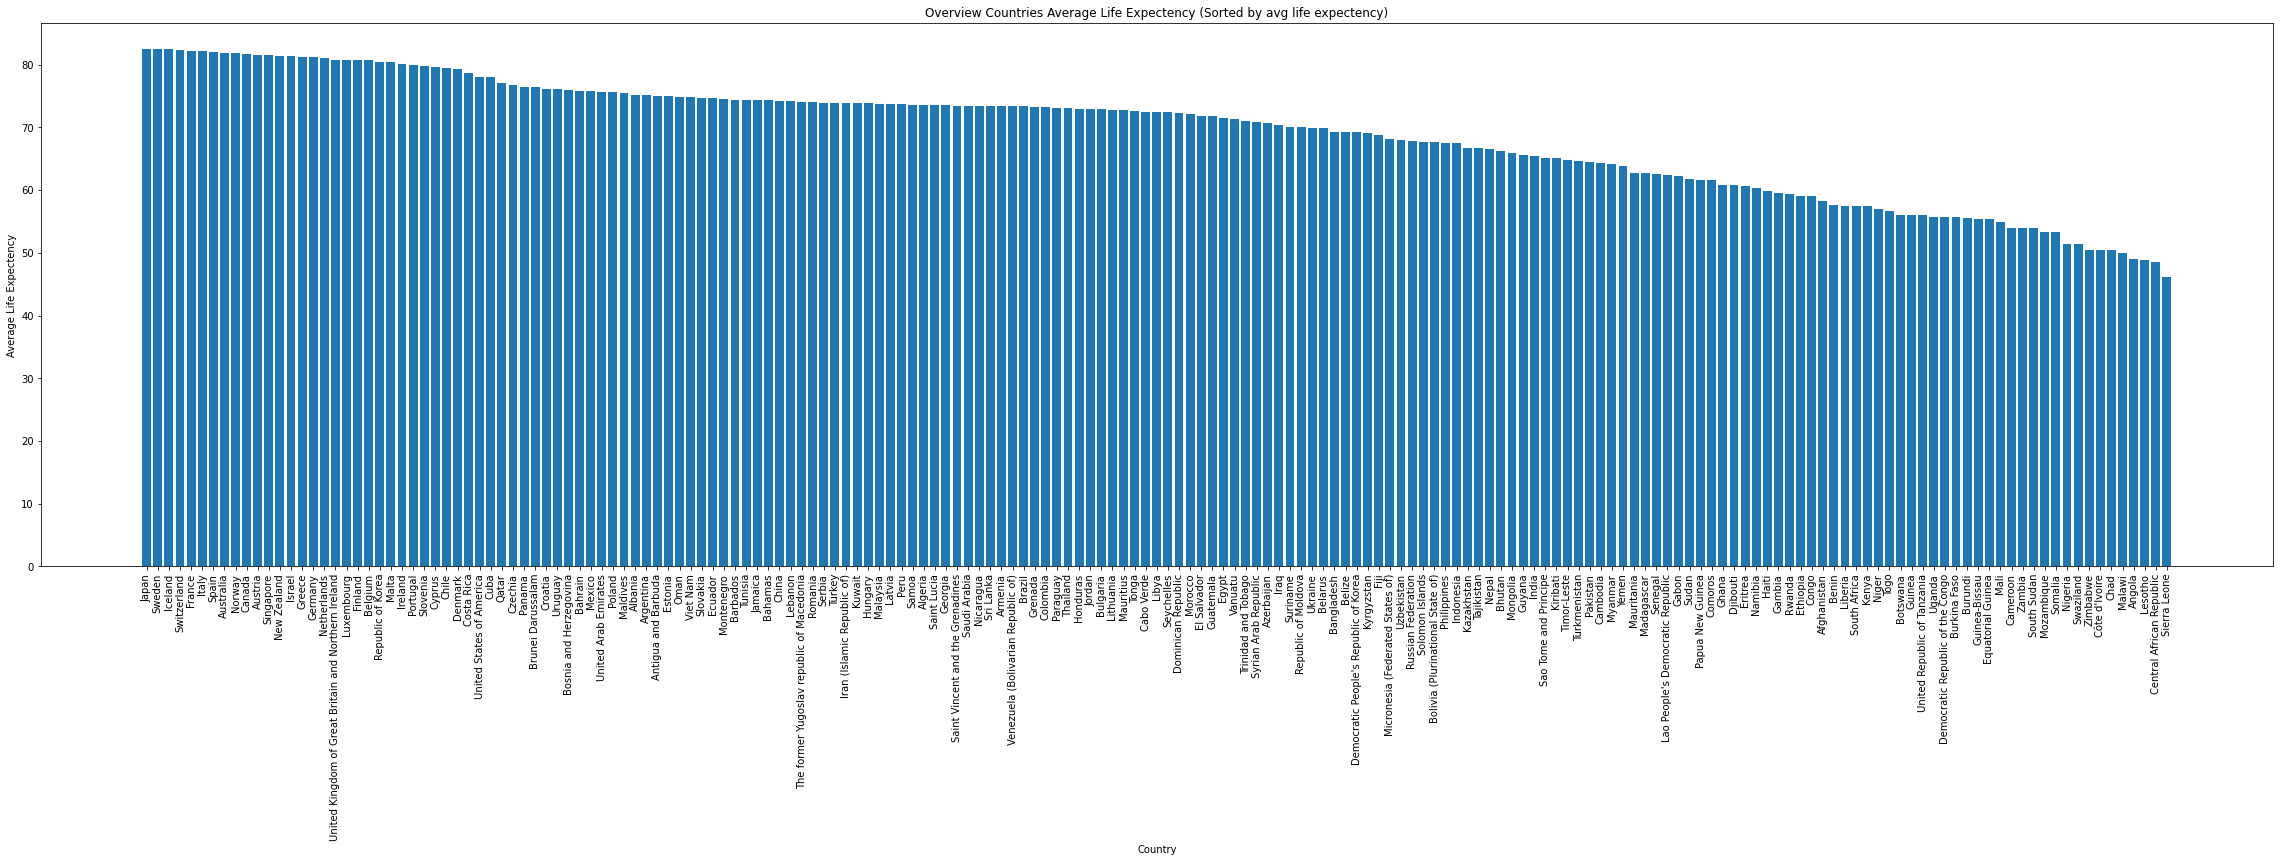

In [62]:
numOfUniqueCountries = len(df["Country"].unique())
# generate supporting charts
groupedByCounterAndAvergedDf = groupedByCounterAndAvergedDf.sort_values(by=['Life expectancy '], ascending=False)
plt.rcParams["figure.figsize"] = (40,10)
plt.title("Overview Countries Average Life Expectency (Sorted by avg life expectency)")
plt.xlabel("Country")
plt.ylabel("Average Life Expectency")
plt.bar(groupedByCounterAndAvergedDf['Country'], groupedByCounterAndAvergedDf['Life expectancy '])
plt.xticks(rotation=90)
plt.show()

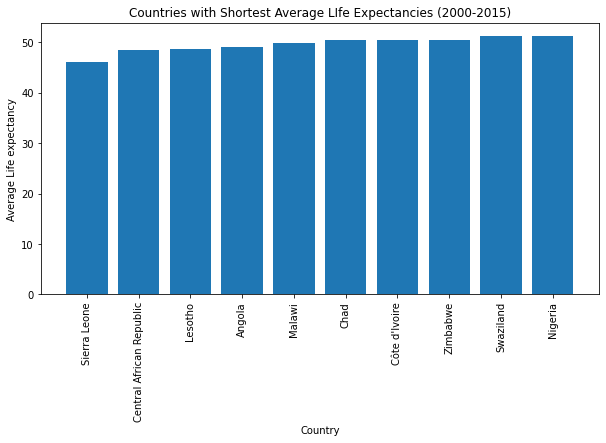

the country Sierra Leone, has the shortest average life expectency at an average of 46.1125


In [63]:
shortest_life_10Countries = df[['Country', 'Life expectancy ']].groupby(
    'Country').mean().nsmallest(10, 'Life expectancy ')
fig = plt.figure(figsize=(10, 5))
ax = plt.bar(shortest_life_10Countries.index, shortest_life_10Countries['Life expectancy '], align='center')
plt.xticks(range(len(shortest_life_10Countries.index)), shortest_life_10Countries.index, rotation='vertical')
plt.title("Countries with Shortest Average LIfe Expectancies (2000-2015)")
plt.xlabel("Country")
plt.ylabel("Average Life expectancy")
plt.show()

print(f'the country {countryName}, has the shortest average life expectency at an average of {avgLifeExpec}')

# B. Which country has the *longest* average life expectancy?
1.   Support your answer by providing your calculations.
2.   Support your answer by providing an appropriate chart.




## Solution(s)

In [64]:
# group all rows by unique values in 'Country' column, then take the mean of 
# all values possible (numerical) of duplicate rows with the same country name 
groupedByCounterAndAvergedDf = df.groupby(['Country']).mean().reset_index()

# clean up data set (remove null values)
groupedByCounterAndAvergedDf = groupedByCounterAndAvergedDf[groupedByCounterAndAvergedDf['Life expectancy '].notna()]

# get the name of the country (row index) of country with shortest 
# average life expectancy and the corrosponding value to it
rowIdx = groupedByCounterAndAvergedDf['Life expectancy '].idxmax()
countryName = groupedByCounterAndAvergedDf.loc[rowIdx][0]
avgLifeExpec = groupedByCounterAndAvergedDf.loc[rowIdx][2]

print(f'the country {countryName}, has the shortest average life expectency at an average of {avgLifeExpec}')


the country Japan, has the shortest average life expectency at an average of 82.5375


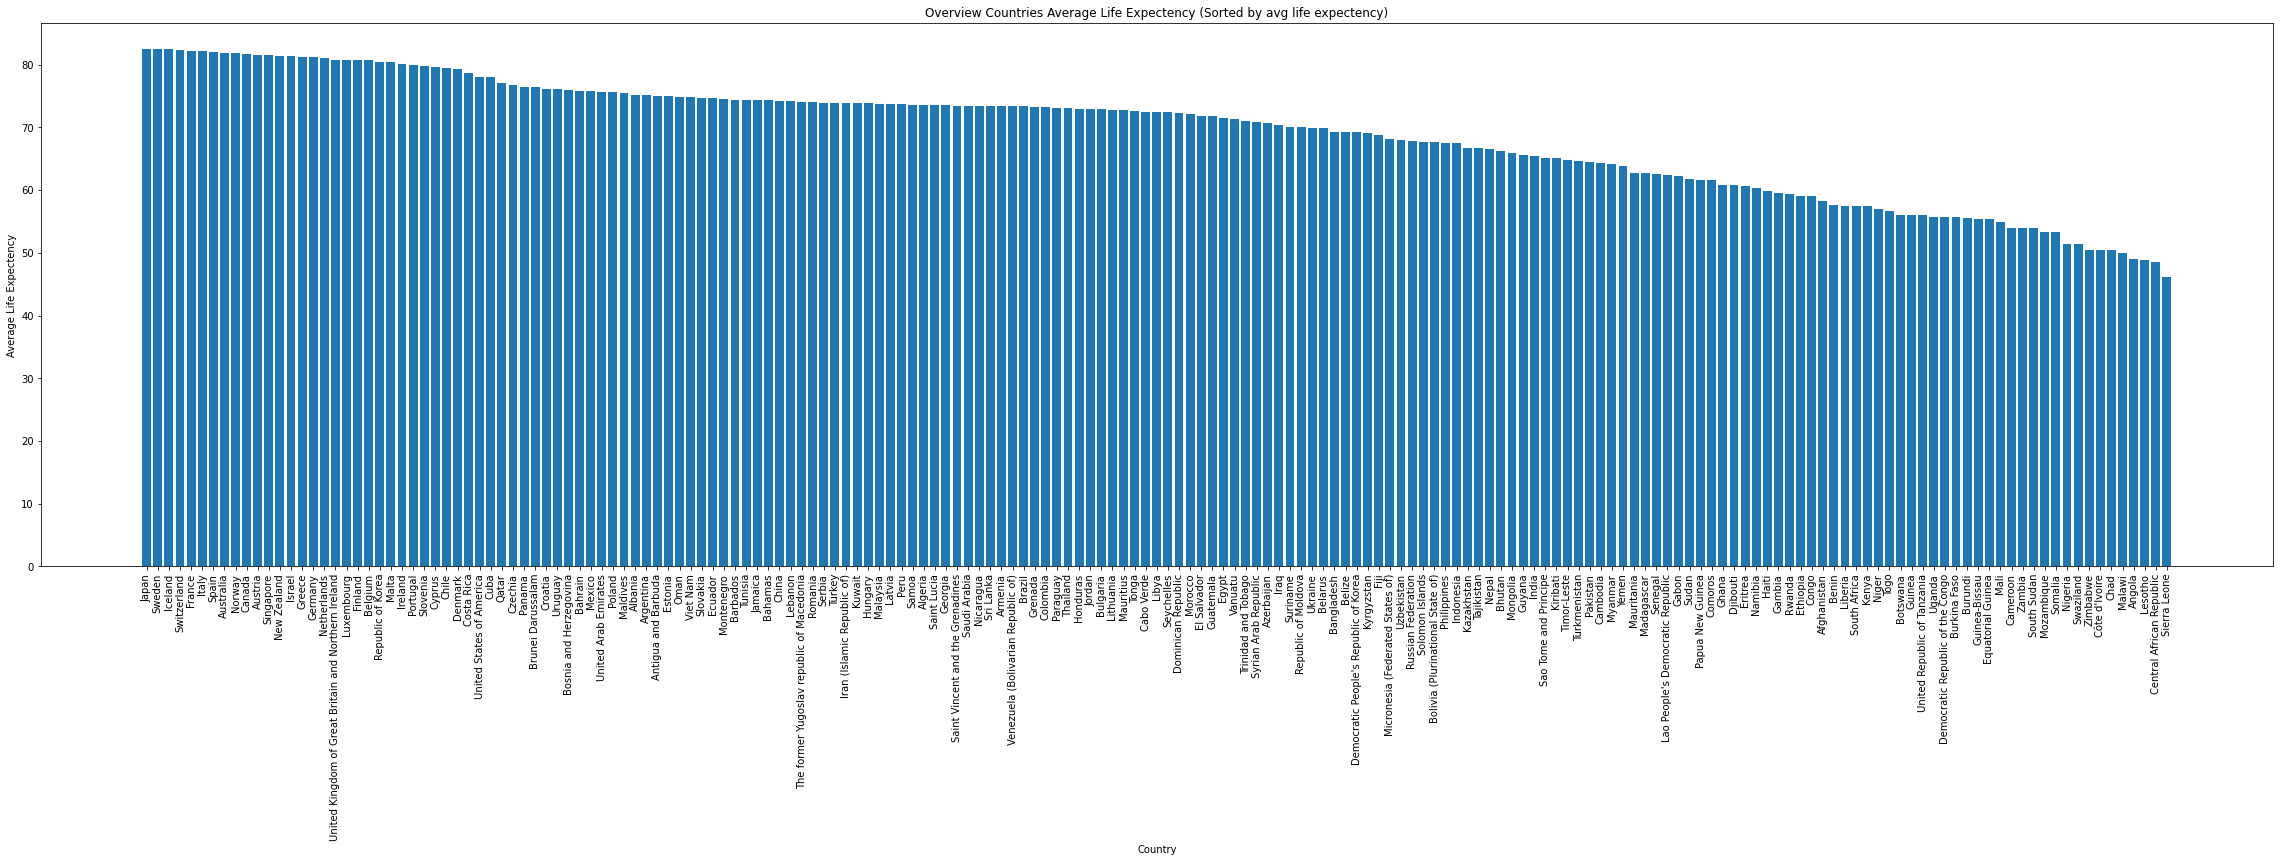

In [65]:
numOfUniqueCountries = len(df["Country"].unique())
# generate supporting charts
groupedByCounterAndAvergedDf = groupedByCounterAndAvergedDf.sort_values(by=['Life expectancy '], ascending=False)
plt.rcParams["figure.figsize"] = (40,10)
plt.title("Overview Countries Average Life Expectency (Sorted by avg life expectency)")
plt.xlabel("Country")
plt.ylabel("Average Life Expectency")
plt.bar(groupedByCounterAndAvergedDf['Country'], groupedByCounterAndAvergedDf['Life expectancy '])
plt.xticks(rotation=90)
plt.show()

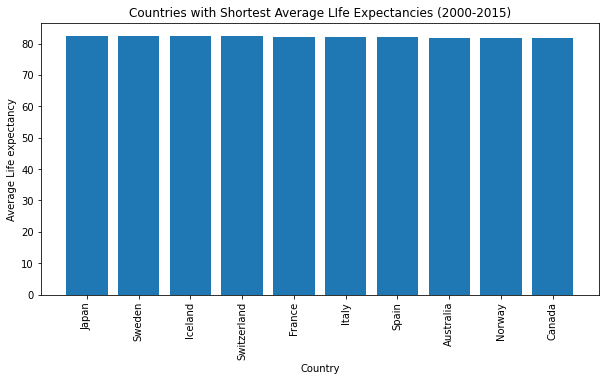

the country Japan, has the longest average life expectency at an average of 82.5375


In [66]:
longest_life_10Countries = df[['Country', 'Life expectancy ']].groupby(
    'Country').mean().nlargest(10, 'Life expectancy ')
fig = plt.figure(figsize=(10, 5))
ax = plt.bar(longest_life_10Countries.index, longest_life_10Countries['Life expectancy '], align='center')
plt.xticks(range(len(longest_life_10Countries.index)), longest_life_10Countries.index, rotation='vertical')
plt.title("Countries with Shortest Average LIfe Expectancies (2000-2015)")
plt.xlabel("Country")
plt.ylabel("Average Life expectancy")
plt.show()

print(f'the country {countryName}, has the longest average life expectency at an average of {avgLifeExpec}')

# C. There is a claim that based on the data from the USA, that there exists a *linear correlation* between a person's *body mass index* (BMI) and their *life expectancy*. Use *linear regression* to validate this claim.
1. Support your answer by providing your calculations.
2. Support your answer by providing an appropriate chart.

## Solution(s)

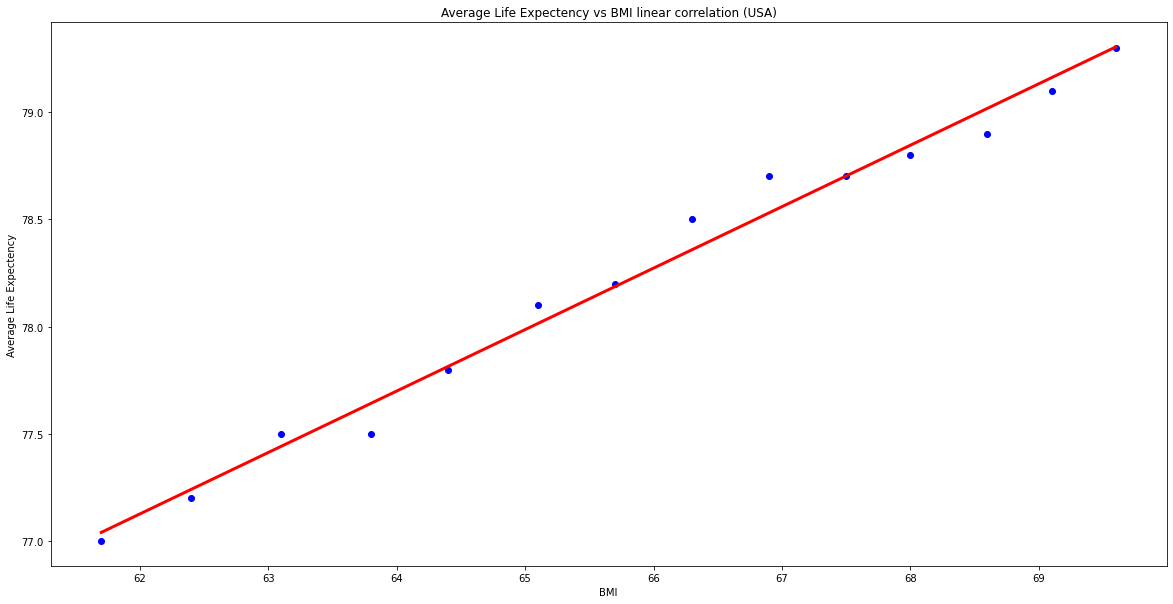

In [67]:
# extract USA rows from original dataframe
usaDf = df.loc[df['Country'] == 'United States of America'].reset_index()

# remove outlier (last two rows)
usaDf = usaDf.iloc[:-2]

# create a linear regressor object and train it with the data at hand
myLRM = skl.LinearRegression()
X = usaDf[' BMI '].values
Y = usaDf['Life expectancy '].values
X = X.reshape(X.shape[0], 1)
Y = Y.reshape(Y.shape[0], 1)
myLRM.fit(X, Y)

# plot scatter of life expectancy vs BMI
plt.rcParams["figure.figsize"] = (20, 10)
plt.title(f"Average Life Expectency vs BMI linear correlation (USA)")
plt.xlabel("BMI")
plt.ylabel("Average Life Expectency")
plt.scatter(X, Y,  color='blue')
plt.plot(X, myLRM.predict(X), color='red', linewidth=3)
plt.show()

On visual inspection of our plot, the regression model looks like it fits the training data well, as we would expect. 
Since nothing is obviously wrong here, we will check the coefficients, mean squared error, and coefficient of determination to get a numerical representation of how accurate the claim of a linear correlation between BMI and life expectancy in the US.

#### Validate Model

In [68]:
usa_y_pred = myLRM.predict(X)

# The coefficients
print('\nCoefficients: ', myLRM.coef_)
# The mean squared error: 0 is 'perfect' prediction
print('Mean squared error: %.2f'
      % mean_squared_error(Y, usa_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y, usa_y_pred))
# Residual Sum of Squares: 0 is 'perfect' prediction
print('Residual sum of squares: %.2f' %
      np.sum((Y - usa_y_pred) ** 2))


Coefficients:  [[0.28651457]]
Mean squared error: 0.01
Coefficient of determination: 0.99
Residual sum of squares: 0.10


These results tell us that the linear correlation does in fact exist. 
In fact, the correlation is so strong that if the model were not trained on this dataset, we would be justified in questioning the valididity of the data. 
Personally, fit makes me a little suspicious of the training data too. 

# D. Use the data from any of the remaining 192 countries as a test set to validate the performance of the model you generated in Part C above. Explain how well your USA data-trained model is predicting the values for the country you selected.
1. Support your answer by providing your  calculations.
2. Support your answer by providing an appropriate chart.

## Solution(s)

model training (USA) score is 0.9853540251998935, or 98.53540251998935% accurate.
model testing (Japan) score is -453.2502855993545, or -45325.028559935454% accurate.
please see next text cell for an explaination.


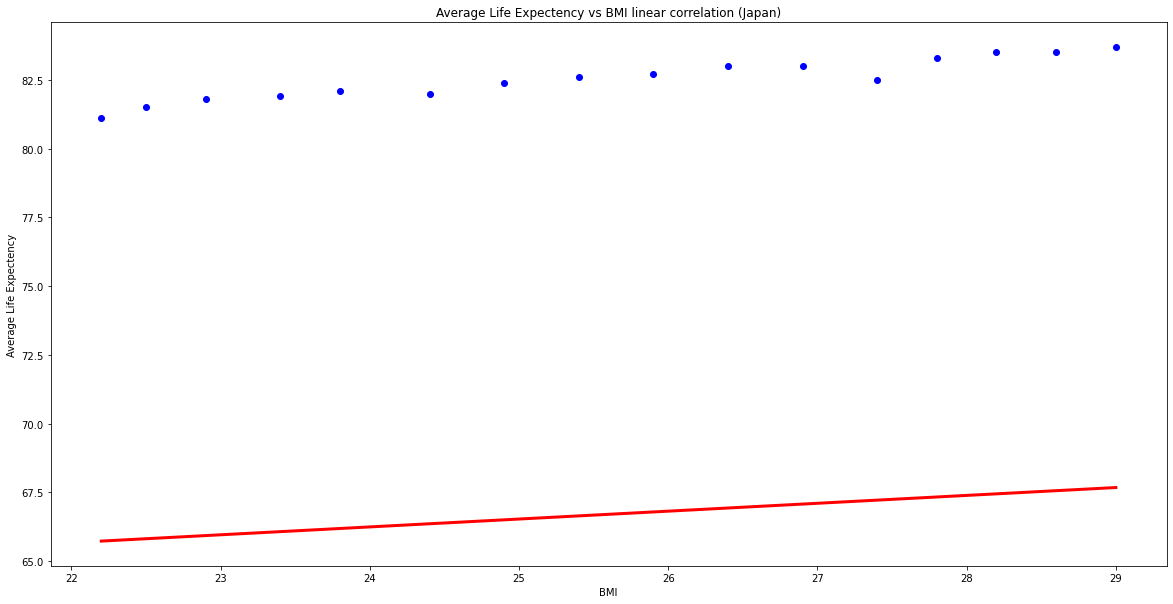

In [69]:
# extract Japan rows from original dataframe
jpDf = df.loc[df['Country'] == 'Japan'].reset_index()

# create a linear regressor object and train it with the data at hand
X_test = jpDf[' BMI '].values
Y_test = jpDf['Life expectancy '].values
X_test = X_test.reshape(X_test.shape[0], 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)

train_score = myLRM.score(X, Y)
test_score = myLRM.score(X_test, Y_test)

print(f"model training (USA) score is {train_score}, or {train_score*100}% accurate.")
print(f"model testing (Japan) score is {test_score}, or {test_score*100}% accurate.")
print("please see next text cell for an explaination.")

# plot scatter of life expectancy vs BMI
plt.rcParams["figure.figsize"] = (20, 10)
plt.title(f"Average Life Expectency vs BMI linear correlation (Japan)")
plt.xlabel("BMI")
plt.ylabel("Average Life Expectency")
plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test, myLRM.predict(X_test), color='red', linewidth=3)
plt.show()

In [70]:
# Test accuracy of US-trained model in predicting Japan lifespan by BMI alone
# Expect poor accuracy
# Generate prediction for 
jp_y_pred = myLRM.predict(X)
# The mean squared error: 0 is 'perfect' prediction
print('Mean squared error: %.2f'
      % mean_squared_error(Y, jp_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y, jp_y_pred))
# Residual Sum of Squares: 0 is 'perfect' prediction
print('Residual sum of squares: %.2f' %
      np.sum((Y -jp_y_pred) ** 2))


Mean squared error: 0.01
Coefficient of determination: 0.99
Residual sum of squares: 0.10


In [71]:
train_score = myLRM.score(X, Y)
test_score = myLRM.score(X_test, Y_test)

print(f"model training (USA) score is {train_score}, or {train_score*100}% accurate.")
print(f"model testing (Japan) score is {test_score}, or {test_score*100}% accurate.")
print("please see next text cell for an explaination.")

model training (USA) score is 0.9853540251998935, or 98.53540251998935% accurate.
model testing (Japan) score is -453.2502855993545, or -45325.028559935454% accurate.
please see next text cell for an explaination.


# Notes
1. Our linear regression model was trained with the data from the USA, which was ~99% accurate. 
2. This show strong linear correlation between BMI and life expectancy in the USA.
3. The same model failed to predict the linear correlation of the same compairson in Japan.
4. It always predicted it to be much lower than what it acctually is in Japan.
5. This can be explained as the fact that the in the USA, we have a relativley lower life expectency with a higher BMI on average. Where as in Japan, we have a relativley higher life expectency and much lower BMIs on average.
6. Assuming all other external factors are identical (hint, they are not. E.g, diet, excercise, air qualit, fatality causes...etc), this would imply that the correlation between BMI and life expectency worldwide. However, this is not the case, as we have many external factors invovled that arn't accounted for in this dataset. Take health care system, diet, and excersie as an example. Therefore, it's not fair to compare the two datasets using the same model with only BMI and life expectency as factors.
7. It may be appropriate to assume that, it's linear, where localized to each country/region seperatly.